[Referencia](MIR_Trabalho_Final_LucasLukasavicus_v3.ipynb)

# Aplicação do Framework CAPM para Títulos de Fundos de Investimento Imobiliário (FIIs)

In [1]:
# Import Third-party Libs

import pandas as pd

In [2]:
# Import Own Libs

from pre_processing import main as pp
from helper import portfolio_assemble, normalize, calculate_daily_return, calculate_sharpe_ratio, calculate_capm
import plot_data as pld

In [3]:
# PRE_PROCESSING DATA

# Read data from IFIX and consolidate all assets' prices from IFIX through the last 5 years

prices_df = pp('IFIXDia_17-07-23.csv')
del prices_df['Unnamed: 0']

In [4]:
# Define portfolios
PORTFOLIOS = {
    'BTG' : 
    {
            'assets' : ['MCCI11', 'KNSC11', 'RBRY11', 'KNCR11', 'RBRF11', 'PVBI11', 'BDIF11', 'KDIF11', 'BTAG11', 'RURA11', 'CPTR11'],
        #     'weights' : [10, 10, 10, 15, 10, 5, 10, 10, 5, 5, 10],
    },

    'PRIMO_RICO' : 
    {
            'assets' : ['ALZR11', 'HGLG11', 'KNRI11', 'BCFF11'],
        #     'weights' : [25, 25, 25, 25],
    },

    'ITAU' : 
    {
            'assets' : ['HGRU11', 'VILG11', 'BRCO11', 'LVBI11', 'RBRP11', 'PVBL11', 'HSML11', 'HGCR11', 'KNCR11', 'KNIP11', 'KNHY11'],
        #     'weights' : [10, 5, 10, 10, 10, 5, 5, 11.25, 11.25, 11.25, 11.25],
    },
    'LUKE' : {
        'assets' : [
            'ALZR11', 'BCFF11', 'BPFF11', 'BRCO11', 'BTLG11', 'CPTS11', 'CVBI11', 'CXCO11', 'CYCR11', 'HABT11',
            'HBRH11', 'HCTR11', 'HGCR11', 'HGLG11', 'HGRE11', 'HGRU11', 'HSML11', 'IRDM11', 'JSRE11', 'KNCR11',
            'KNSC11', 'LVBI11', 'MALL11', 'OURE11', 'RBRP11', 'RBVA11', 'RECR11', 'RZAT11', 'SPTW11', 'TEPP11',
            'TGAR11', 'TORD11', 'URPR11', 'VGIP11', 'VGIR11', 'VILG11', 'VINO11', 'XPCM11', 'XPLG11', 'XPML11'
        ]
    }
}


In [5]:
prices_df_temp = prices_df.copy()
cols = [c.replace('_price', '') for c in prices_df.columns]
prices_df_temp.columns = cols

# ---------------------------------------------------------------------------

btg_in_ifix = [c for c in PORTFOLIOS['BTG']['assets'] if (c in prices_df_temp.columns)]
primo_rico_in_ifix = [c for c in PORTFOLIOS['PRIMO_RICO']['assets'] if (c in prices_df_temp.columns)]
itau_in_ifix = [c for c in PORTFOLIOS['ITAU']['assets'] if (c in prices_df_temp.columns)]
luke_in_ifix = [c for c in PORTFOLIOS['LUKE']['assets'] if (c in prices_df_temp.columns)]

In [10]:
btg_df = portfolio_assemble(prices_df_temp, btg_in_ifix)
primo_rico_df = portfolio_assemble(prices_df_temp, primo_rico_in_ifix)
itau_df = portfolio_assemble(prices_df_temp, itau_in_ifix)
luke_df = portfolio_assemble(prices_df_temp, luke_in_ifix)

In [11]:
btg_df['BTG'] = btg_df['portfolio']

primo_rico_df['PRIMO_RICO'] = primo_rico_df['portfolio']
del primo_rico_df['date']

itau_df['ITAU'] = itau_df['portfolio']
del itau_df['date']

luke_df['LUKE'] = luke_df['portfolio']
del luke_df['date']


df_portfolio = pd.concat([btg_df, primo_rico_df, itau_df, luke_df], axis=1)
del df_portfolio['portfolio']

df_portfolio['IFIXm'] = prices_df_temp['IFIX'] / len(prices_df_temp.columns) - 2 # excluding date and ifix columns

df_portfolio.head(15)

date        BTG  PRIMO_RICO    ITAU       LUKE      IFIXm
0   2018-07-16  33.683333    110.7375  32.006  45.045714  53.893759
1   2018-07-17  33.860000    111.4650  31.995  45.230571  54.186303
2   2018-07-18  34.080000    110.6525  32.038  45.098000  53.122819
3   2018-07-19  34.101667    111.1925  32.090  45.028857  53.652483
4   2018-07-20  33.993333    110.9000  32.110  44.927143  53.666773
5   2018-07-23  34.076667    110.9225  32.185  44.985714  53.732693
6   2018-07-24  34.180000    111.2875  32.093  45.064000  53.506478
7   2018-07-25  33.933333    111.1800  32.600  45.156857  53.801622
8   2018-07-26  34.018333    111.1750  32.202  44.921429  53.585733
9   2018-07-27  34.241667    111.1350  43.394  48.246286  55.661425
10  2018-07-30  34.350000    110.9600  42.925  48.053714  55.619481
11  2018-07-31  34.265000    111.1175  43.073  48.574286  55.810676
12  2018-08-01  34.366667    111.0775  31.950  45.026857  53.569012
13  2018-08-02  34.320000    110.8400  42.391  47.940286  55.139424
14  2018-08-03  34.298333    111.2550  42.335  48.310857  55.589193

### 3.2 Análise de Dados

Nessa seção vamos analisar os dados coletados para as carteiras baseadas no IFIX

In [ ]:
pld.show_plot(prices_df, 'Historico de Preços (Todos os Papeis)')

In [ ]:
pld.show_plot(df_portfolio, 'Historico de Preços (Carteiras)')

In [14]:
pld.show_plot(normalize(df_portfolio), 'Historico de Preços (Carteiras) - Normalizados')

Quando comparamos as carteiras com os preços originais, temos a impressão que a carteira _'PRIMO_RICO'_ parece ser a melhor. Porém, quando analisamos as mesmas carteiras de forma normalizada, vemos que temos os maiores ganhos com a carteira do _ITAU_.

In [ ]:
# DAILY RETURNS
prices_daily_return = calculate_daily_return(prices_df)

pld.show_plot(prices_daily_return, "Retornos Diários - Preços")
# prices_daily_returnW

In [ ]:
# DAILY RETURNS
portfolio_daily_return = calculate_daily_return(df_portfolio)

pld.show_plot(portfolio_daily_return, "Retornos Diários - Portfolio")
# prices_daily_returnW

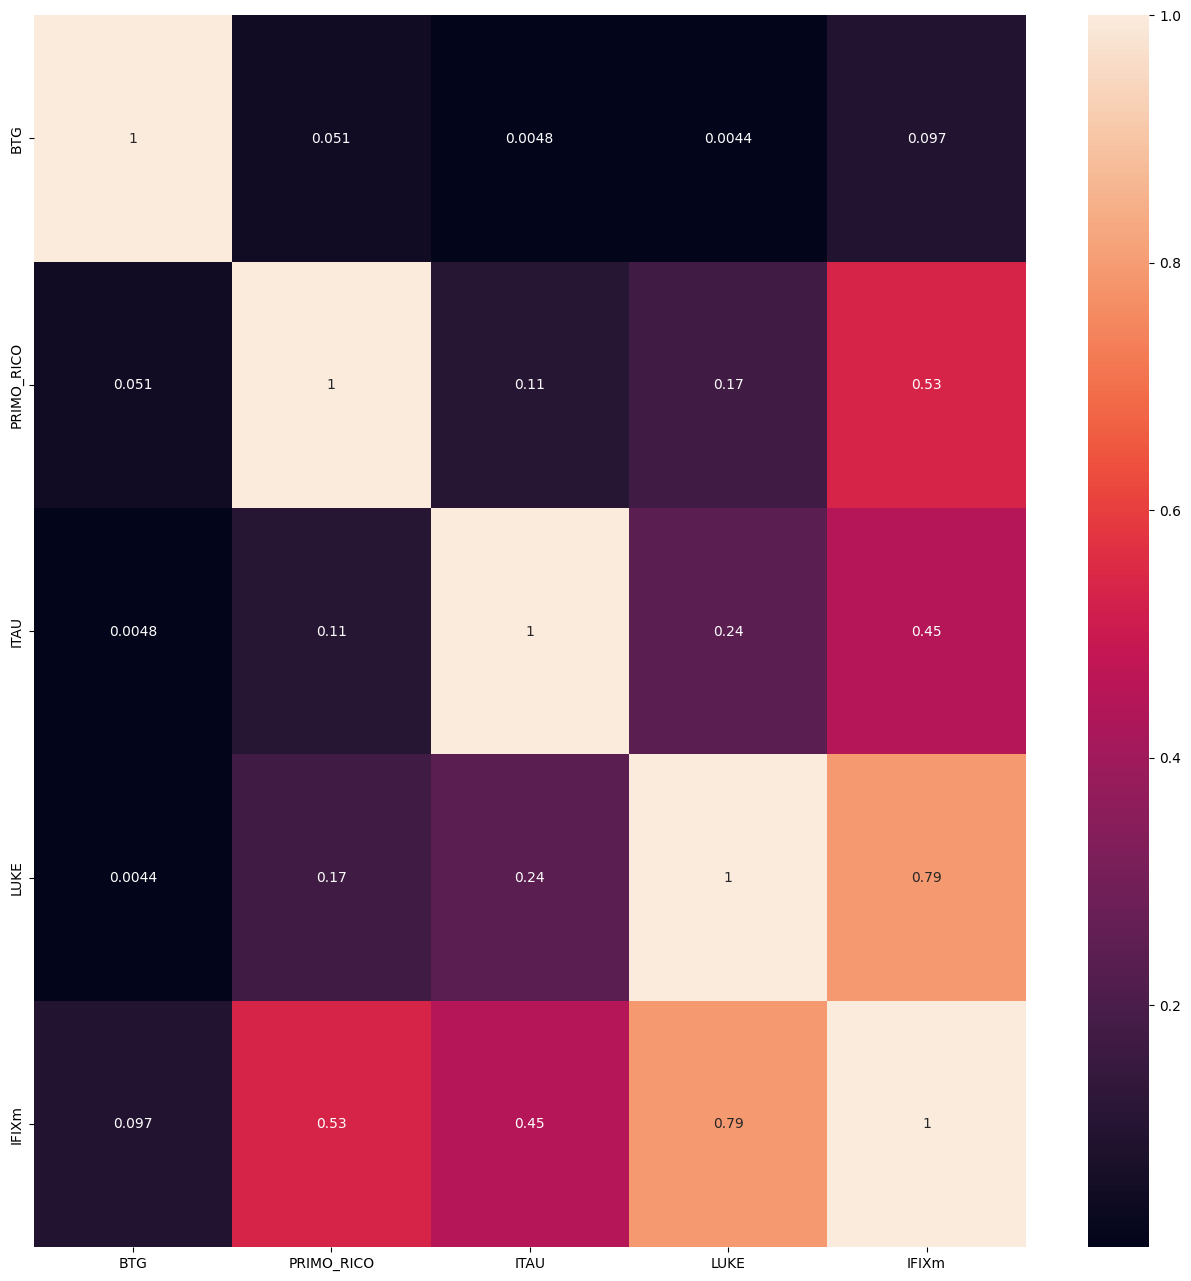

In [17]:
pld.show_correlation(portfolio_daily_return)

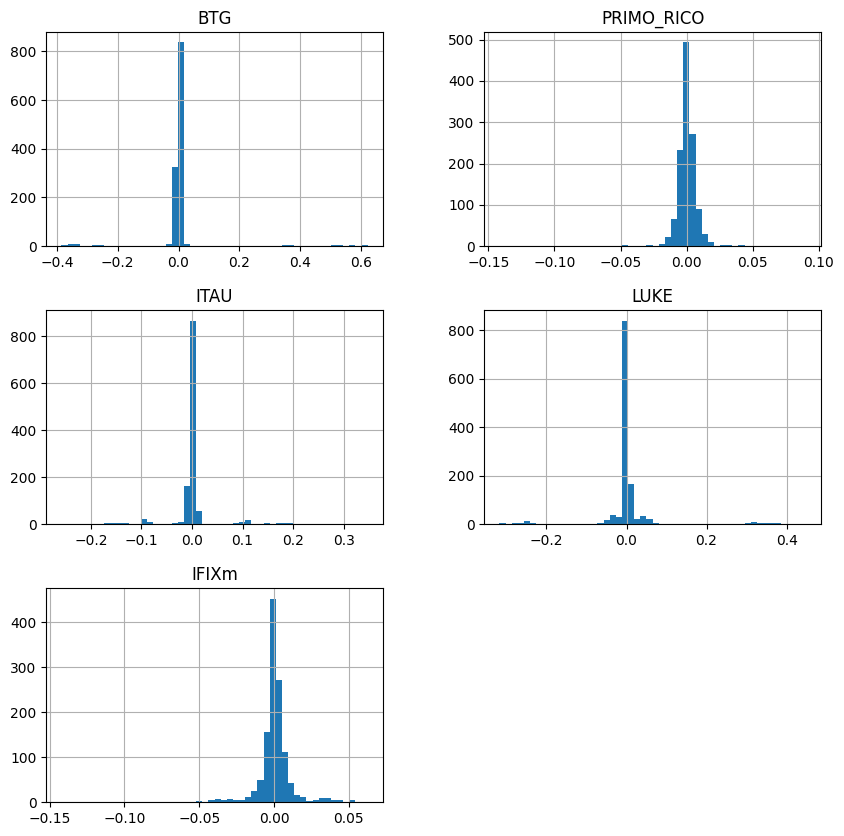

In [18]:
# prices_daily_return.hist(figsize=(10,10),bins=50);
# pld.show_hist(prices_daily_return, (10,10), 50)

pld.show_hist(portfolio_daily_return, (10,10), 50)

Com essa visualização podemos ver que as carteiras de forma geral tem uma maior concentração (por conta da "cintura" do histograma), enquanto que o indicador IFIX tem menor concentração.
Essa leitura confirma nossa intuição, uma vez que o IFIX é composto por muito mais ativos do que cada carteira.

O próximo gráfico mostra esse mesmo cenário, porém com os dados sobrepostos.

In [19]:
pld.show_distplot(portfolio_daily_return);

> Conclusões após a análise de dados inicial:

- Pelos gráficos dos valores históricos das carteiras, pudemos observar o aumento do preço ao longo do tempo. A partir da análise dos valores normalizados também pudemos ver que a carteira do _Itau_ foi a que teve maior valorização. Contudo através da análise de retornos diários, vimos que nenhuma das carteiras obteve muito destaque ao longo do tempo, uma hipótese que poderia explicar isso, é o fato da remuneração dos FIIs ser diferente da remuneração de outros ativos como ações. No caso dos fundos de investimento imobiliários, temos o rendimento dado através do pagamento mensal (na maioria dos ativos dessa classe) de um valor de "aluguel". Sendo assim, o retorno do papel se dá através do pagamento desses redimentos ao invés da sua valorização ao longo do tempo. Por fim, nessa análise inicial pudemos observar o quanto as carteiras são correlacionadas, com destaque para a carteira do _Primo Rico_ que teve maior correlação com o IFIX, provavelmente devido ao fato dessa carteira ser composta por menos ativos e ativos com maior expressão (maior peso) dentro do índice. A última análise dessa seção focou em entender o comportamento das medidas estatísticas de média e variancia de todas as carteiras, onde pudemos observar que o IFIX tem a maior variancia. Essa observação é interessante pois ainda que podemos ter maior diversificação do risco através da composição de uma carteira mais ampla (o IFIX representa uma carteira teórica com mais de 100 ativos de FIIs), ao mesmo tempo temos que nos atentar a variação dos preços desses ativos.

---

### 3.3 Análise Economica

Nessa seção iremos usar métricas economicas para determinar o comportamento das carteiras e análisa-las em diferentes cenários ao longo do tempo.

Uma forma de analisar as carteiras é verificando métricsa como `retorno médio` e `retorno acumulado`:

In [20]:
pdr = portfolio_daily_return[['IFIXm', 'ITAU', 'BTG', 'PRIMO_RICO', 'LUKE']]

pdr.head(10)

IFIXm      ITAU       BTG  PRIMO_RICO      LUKE
0       NaN       NaN       NaN         NaN       NaN
1  0.005428 -0.000344  0.005245    0.006570  0.004104
2 -0.019626  0.001344  0.006497   -0.007289 -0.002931
3  0.009971  0.001623  0.000636    0.004880 -0.001533
4  0.000266  0.000623 -0.003177   -0.002631 -0.002259
5  0.001228  0.002336  0.002451    0.000203  0.001304
6 -0.004210 -0.002858  0.003032    0.003291  0.001740
7  0.005516  0.015798 -0.007217   -0.000966  0.002061
8 -0.004013 -0.012209  0.002505   -0.000045 -0.005214
9  0.038736  0.347556  0.006565   -0.000360  0.074015

In [21]:
pdr.mean()

IFIXm         0.000439
ITAU          0.002028
BTG           0.004867
PRIMO_RICO    0.000159
LUKE          0.002889
dtype: float64

In [22]:
# portfolio_daily_return[['IFIXm', 'ITAU', 'BTG', 'PRIMO_RICO']].sum(axis=1)
cumulative_returns = (pdr + 1).prod() - 1

cumulative_returns

IFIXm         0.564418
ITAU          2.176592
BTG           1.778427
PRIMO_RICO    0.161124
LUKE          1.022187
dtype: float64

Outra métrica importante para compararmos o comportamento das carteiras é o `Sharpe Ratio`. O `Índice de Sharpe` é um indicador que permite avaliar a relação risco _x_ retorno de um investimento ou carteira.
O Índice de Sharpe é calculado com base nos valores do retorno dos papéis que compõem uma determinada carteira.
A sua interpretação é:
- Valores positivos: Indicam que a carteira tem um rendimento que compensa o seu risco.
- Valores negativos: Indicam que a carteira tem um rendimento que **não** compensa o seu risco.

Leia "compensar" o risco como: A carteira paga valores superiores ao de uma carteira com _"risco zero"_. Nesse caso, esse risco é teórico, porque não existe nenhum ativo que não possua risco. Porém, tomemos como base títulos de Tesouro Direto do Governo Brasileiro, o risco desse investimento é o chamado _"risco-país"_, porque esse título só irá ter prejuízo em caso de calote do Governo Brasileiro.


In [23]:
calculate_sharpe_ratio(pdr)

IFIXm         0.560779
ITAU          0.680308
BTG           0.820437
PRIMO_RICO    0.290550
LUKE          0.659950
dtype: float64

### 3.4 CAPM

O CAPM (Capital Asset Portfolio Management) é um framework que visa avaliar qual deveria ser a taxa de um determinado investimento para que esse investimento valesse o risco associado. Em termos matemáticos, o CAPM é dado como:

$ E(R_i) = R_f + \beta_im * (E(R_m) - R_f) $

Onde temos:

- $E(R_i)$ - Retorno esperado do ativo
- $R_f$ - Taxa de Juros livre de risco
- $\beta_im$ - coeficiente utilizado como forma de medir a sensibilidade dos retornos do ativo com relação aos retornos do mercado;
- $E(R_m)$ - Retorno esperado do mercado


Utilizando o CAPM podemos medir o quanto uma carteira pode trazer de retorno, pois ele produz o retorno esperado.
Aplicando esse framework às nossas carteiras temos:

In [24]:
pdr

IFIXm      ITAU       BTG  PRIMO_RICO      LUKE
0          NaN       NaN       NaN         NaN       NaN
1     0.005428 -0.000344  0.005245    0.006570  0.004104
2    -0.019626  0.001344  0.006497   -0.007289 -0.002931
3     0.009971  0.001623  0.000636    0.004880 -0.001533
4     0.000266  0.000623 -0.003177   -0.002631 -0.002259
...        ...       ...       ...         ...       ...
1236 -0.003479 -0.008450 -0.003741    0.004221 -0.003835
1237  0.000877 -0.000927 -0.004446    0.003661  0.000801
1238 -0.001065  0.001392  0.000427   -0.004786 -0.000282
1239 -0.000451  0.001035 -0.002650   -0.000039 -0.000964
1240  0.000870  0.001270  0.001284   -0.002676  0.001643

[1241 rows x 5 columns]

In [25]:
metrics = []
# for portfolio in PORTFOLIOS.keys():
for portfolio in pdr.columns:
    er, a, b = calculate_capm(pdr['IFIXm'], pdr[portfolio])
    metrics.append({'portfolio' : portfolio, 'expected_return' : er, 'alpha' : a, 'beta' : b})

In [26]:
mdf = pd.DataFrame(metrics)
mdf

portfolio  expected_return         alpha      beta
0       IFIXm         0.110723 -1.679867e-18  1.000000
1        ITAU         0.189116  1.277683e-03  1.708020
2         BTG         0.081355  4.543780e-03  0.734769
3  PRIMO_RICO         0.041360 -5.073182e-06  0.373546
4        LUKE         0.489932  9.444766e-04  4.424868

In [27]:
# PLACING ALL METRICS TOGETHER
mdf['mean_return'] = list(pdr.mean())
mdf['cumulative_return'] = list(cumulative_returns)
mdf['sharpe_ratio'] = list(calculate_sharpe_ratio(pdr))

In [28]:
mdf

portfolio  expected_return         alpha      beta  mean_return   
0       IFIXm         0.110723 -1.679867e-18  1.000000     0.000439  \
1        ITAU         0.189116  1.277683e-03  1.708020     0.002028   
2         BTG         0.081355  4.543780e-03  0.734769     0.004867   
3  PRIMO_RICO         0.041360 -5.073182e-06  0.373546     0.000159   
4        LUKE         0.489932  9.444766e-04  4.424868     0.002889   

   cumulative_return  sharpe_ratio  
0           0.564418      0.560779  
1           2.176592      0.680308  
2           1.778427      0.820437  
3           0.161124      0.290550  
4           1.022187      0.659950

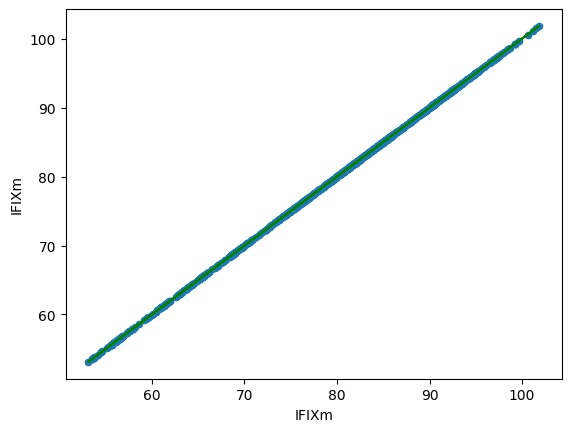

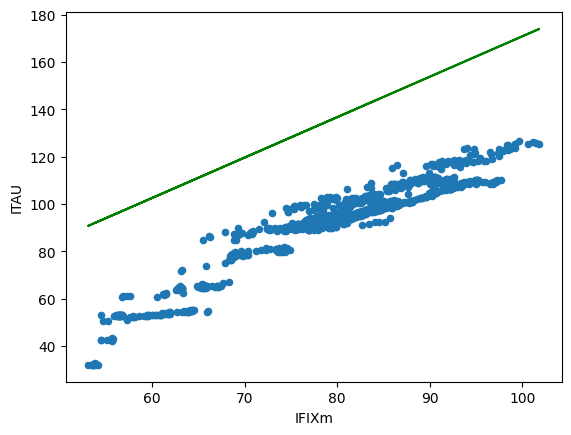

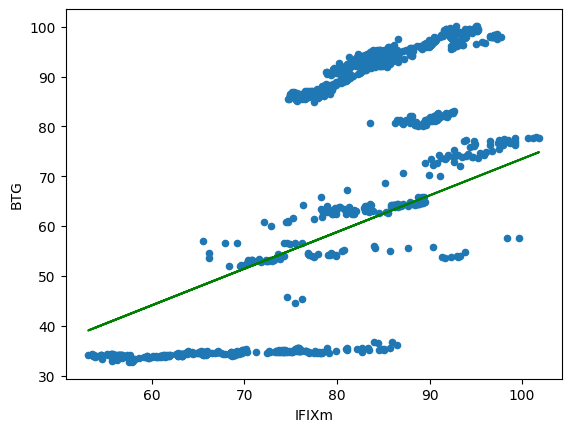

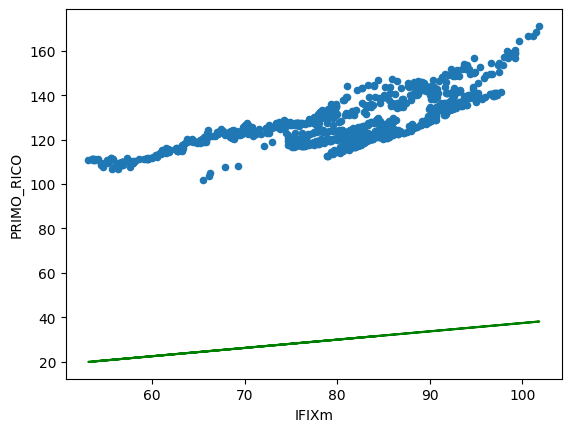

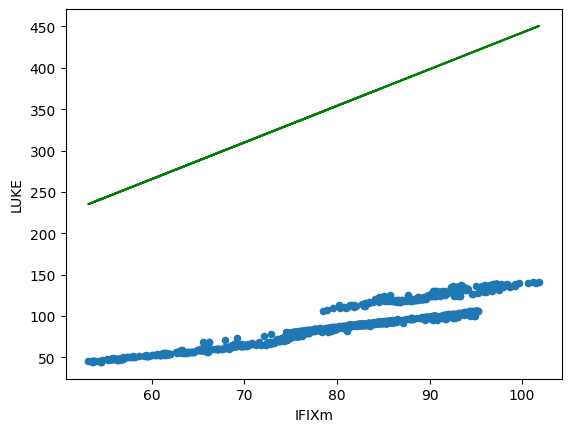

In [29]:
# for p in PORTFOLIOS.keys():
    # pld.show_scatter_base_vs_asset(df_portfolio, 'IFIXm', p)

for i, row in mdf.iterrows():
    pld.show_scatter_base_vs_asset_with_trendline(df_portfolio, 'IFIXm', row['portfolio'], row['alpha'], row['beta'])

Final conclusions:


---

# Resultados

Após todas as análises chegamos a tabela de `métricas` das carteiras:

In [30]:
mdf

portfolio  expected_return         alpha      beta  mean_return   
0       IFIXm         0.110723 -1.679867e-18  1.000000     0.000439  \
1        ITAU         0.189116  1.277683e-03  1.708020     0.002028   
2         BTG         0.081355  4.543780e-03  0.734769     0.004867   
3  PRIMO_RICO         0.041360 -5.073182e-06  0.373546     0.000159   
4        LUKE         0.489932  9.444766e-04  4.424868     0.002889   

   cumulative_return  sharpe_ratio  
0           0.564418      0.560779  
1           2.176592      0.680308  
2           1.778427      0.820437  
3           0.161124      0.290550  
4           1.022187      0.659950

---

In [35]:
len_luke = len(PORTFOLIOS['LUKE']['assets'])
len_luke_ifix = len(luke_in_ifix)
print(len_luke, len_luke_ifix)

40 35


#### Análise dos Componentes Individuais que compõem a carteira do Luke

Através das análises que fizemos e da tabelas que obtivemos após a aplicação de diversas técnicas e métricas, podemos ver que a carteira do _Itau_ é a que possui o maior valor esperado de retorno. Ela também apresenta o maior retorno acumulativo, isso mostra a solidez histórica dessa carteira, o que pode ser confirmado quando anaisamos o gráfico da média e variancia dessa carteira. Ainda assim, a carteira do BTG apresenta o maior Índice de Sharpe, o que poderia dizer que essa carteira tem um perfil de risco mais ajustado dentro do período analisado.
Essas análises em conjunto podem munir investidores de diferentes perfis de valiosas informações que podem ajuda-los a compor uma carteira mais balanceada e ajustada dentro dos seus objetivos pessoais.

# Discussão e Limitações da Pesquisa

Essa pesquisa é ainda bastante preliminar pois utiliza ainda um conjunto de dados bastante limitado (cerca de 100 ativos de FIIs). Podemos introduzir mais ativos e compará-los com outras métricas (CDI, Selic, IPCA, IGP-M e etc). Além disso seria interessante comparar as métricas e frameworks explorados nessa pesquisa contra outros frameworks clássicos (CVaR) e métricas (índice de Treynor, Sortino, Omega, Calmar e etc).

# Bibliografia Utilizada


- [1] MARKOWITZ, H. Portfolio selection. The Journal of Finance, v. 7, n. 1, p. 77-91, 1952.
- [2] SHARPE, W. F. Capital asset prices: A theory of market equilibrium under conditions of risk. The Journal of Finance, v. 19, n. 3, p. 425-442, 1964.

- Links:
    - [B3 - cotação IFIX](https://www.infomoney.com.br/cotacoes/b3/indice/ifix/historico/#page2)
    - [B3 - cotação IFIX - Histórico](https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-fundos-de-investimentos-imobiliarios-ifix-estatisticas-historicas.htm)
    - [S&P 500 Index: What It’s for and Why It’s Important in Investing](https://www.investopedia.com/terms/s/sp500.asp#:~:text=The%20S%26P%20is%20a%20float,even%20the%20entire%20equities%20market.);
    - [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)
    - [S&P500](https://portfolioslab.com/portfolio/sp-500)
    - [Calculation on Sharpe Ratio](https://www.investopedia.com/ask/answers/010815/how-do-you-calculate-sharpe-ratio-excel.asp)
    - [Carteira FIIs - Primo Rico](https://fiis.com.br/noticias/fundos-imobiliarios-da-carteira-do-primo-rico/)
    - [Carteira FIIs - BTG](https://content.btgpactual.com/research/carteiras-recomendadas/carteira-recomendada/64abf195bf7c0333b38ff2b3/Top-Fundos-Julho-23)
    - [Carteira FIIs - Itau](https://www.itaucorretora.com.br/assessoria/carteira-recomendada-de-fundos-imobiliarios.aspx?ma)
    - [CAPM](https://www.financestrategists.com/wealth-management/valuation/capital-asset-pricing-model/)
    - [CAPM - termo](https://www.investopedia.com/terms/c/capm.asp)
    - [VaR e CVaR](https://www.ise.ufl.edu/uryasev/files/2011/11/VaR_vs_CVaR_CARISMA_conference_2010.pdf)
    - [PortfoliosLab](https://portfolioslab.com/)